### Imports

In [1]:
import GEOparse
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
gse = GEOparse.get_GEO(geo="GSE19188", destdir="./")

20-Jan-2026 22:01:43 DEBUG utils - Directory ./ already exists. Skipping.
20-Jan-2026 22:01:43 INFO GEOparse - File already exist: using local version.
20-Jan-2026 22:01:43 INFO GEOparse - Parsing ./GSE19188_family.soft.gz: 
20-Jan-2026 22:01:43 DEBUG GEOparse - DATABASE: GeoMiame
20-Jan-2026 22:01:43 DEBUG GEOparse - SERIES: GSE19188
20-Jan-2026 22:01:43 DEBUG GEOparse - PLATFORM: GPL570
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\GEOparse\GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
20-Jan-2026 22:01:45 DEBUG GEOparse - SAMPLE: GSM475656
20-Jan-2026 22:01:45 DEBUG GEOparse - SAMPLE: GSM475657
20-Jan-2026 22:01:45 DEBUG GEOparse - SAMPLE: GSM475658
20-Jan-2026 22:01:46 DEBUG GEOparse - SAMPLE: GSM475659
20-Jan-2026 22:01:46 DEBUG GEOparse - SAMPLE: GSM475660
20-Jan-2026 22:01:46 DEBUG GEOparse - SAMPLE: GSM475661
20-Jan-2026 22

In [ ]:
egfr_id = "201983_s_at"

plot_data = []

for gsm_id, gsm in gse.gsms.items():
    expression_value = float(gsm.table.set_index('ID_REF').loc[egfr_id, 'VALUE'])
    meta_str = gsm.metadata.get('characteristics_ch1', [''])[0].lower()

    if 'tumor' in meta_str:
        status = 'Tumor'
    elif 'healthy' in meta_str:
        status = 'Normal'
    else:
        continue
    
    plot_data.append({
        'sample_id': gsm_id,
        'EGFR Expression (log2)': expression_value,
        'Status': status
    })

plot_data

[{'sample_id': 'GSM475656',
  'EGFR Expression (log2)': -1.347790783,
  'Status': 'Tumor'},
 {'sample_id': 'GSM475657',
  'EGFR Expression (log2)': 0.112545272,
  'Status': 'Normal'},
 {'sample_id': 'GSM475658',
  'EGFR Expression (log2)': 0.627230798,
  'Status': 'Normal'},
 {'sample_id': 'GSM475659',
  'EGFR Expression (log2)': 0.181683408,
  'Status': 'Normal'},
 {'sample_id': 'GSM475660',
  'EGFR Expression (log2)': 0.255015796,
  'Status': 'Normal'},
 {'sample_id': 'GSM475661',
  'EGFR Expression (log2)': -4.260568906,
  'Status': 'Tumor'},
 {'sample_id': 'GSM475662',
  'EGFR Expression (log2)': 0.429603326,
  'Status': 'Tumor'},
 {'sample_id': 'GSM475663',
  'EGFR Expression (log2)': -0.149641699,
  'Status': 'Normal'},
 {'sample_id': 'GSM475664',
  'EGFR Expression (log2)': -0.334854877,
  'Status': 'Tumor'},
 {'sample_id': 'GSM475665',
  'EGFR Expression (log2)': -0.194847859,
  'Status': 'Normal'},
 {'sample_id': 'GSM475666',
  'EGFR Expression (log2)': -0.954360689,
  'Status

In [4]:
diff_expression_df = pd.DataFrame(plot_data)
diff_expression_df

,sample_id,EGFR Expression (log2),Status
0,GSM475656,-1.347791,Tumor
1,GSM475657,0.112545,Normal
2,GSM475658,0.627231,Normal
3,GSM475659,0.181683,Normal
4,GSM475660,0.255016,Normal
...,...,...,...
151,GSM475807,-1.146171,Normal
152,GSM475808,1.381221,Tumor
153,GSM475809,-0.132758,Normal
154,GSM475810,-1.285899,Tumor


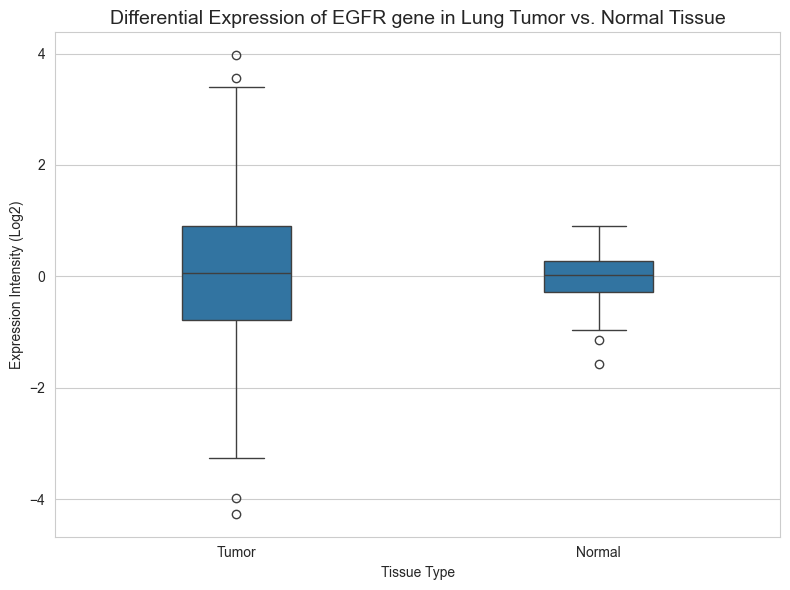

In [5]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

sns.boxplot(x='Status', y='EGFR Expression (log2)', data=diff_expression_df, whis=1.5, width=0.3)

plt.title(f'Differential Expression of EGFR gene in Lung Tumor vs. Normal Tissue', fontsize=14)
plt.ylabel('Expression Intensity (Log2)')
plt.xlabel('Tissue Type')

plt.tight_layout()
plt.show()

p-value: 0.7572480873628267


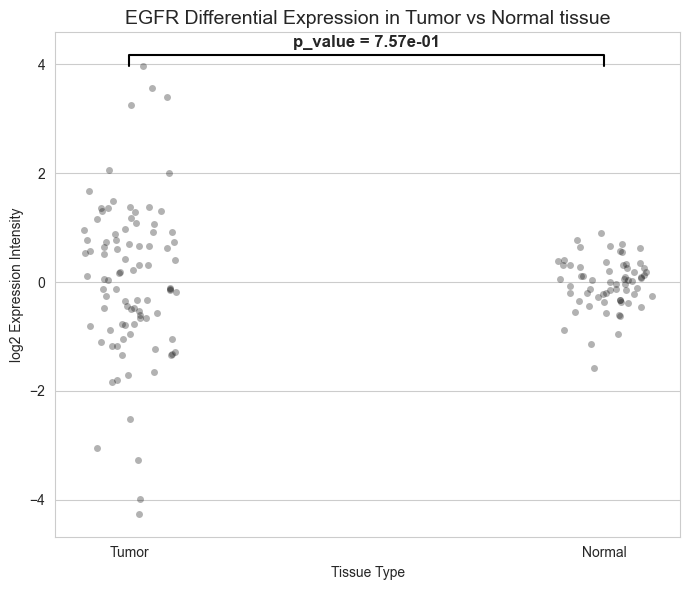

In [7]:
tumor_vals = diff_expression_df[diff_expression_df['Status'] == 'Tumor']['EGFR Expression (log2)']
normal_vals = diff_expression_df[diff_expression_df['Status'] == 'Normal']['EGFR Expression (log2)']

t_test, p_value = ttest_ind(tumor_vals, normal_vals)
print(f"p-value: {p_value}")

plt.figure(figsize=(7, 6))
sns.set_style("whitegrid")

sns.stripplot(x='Status', y='EGFR Expression (log2)', data=diff_expression_df, color='black', alpha=0.3)

y_max = diff_expression_df['EGFR Expression (log2)'].max()
line_height = y_max
plt.plot([0, 0, 1, 1], [line_height, line_height + 0.2, line_height + 0.2, line_height], lw=1.5, c='black')
plt.text(0.5, line_height + 0.3, f"p_value = {p_value:.2e}", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('EGFR Differential Expression in Tumor vs Normal tissue', fontsize=14)
plt.ylabel('log2 Expression Intensity')
plt.xlabel('Tissue Type')

plt.tight_layout()
plt.show()

In [8]:
egfr_probes = ["201983_s_at", "201984_s_at", "211607_x_at", "210984_x_at"]

plot_data = []

for gsm_id, gsm in gse.gsms.items():
    for egfr_id in egfr_probes:
        expression_value = float(gsm.table.set_index('ID_REF').loc[egfr_id, 'VALUE'])
        meta_str = gsm.metadata.get('characteristics_ch1', [''])[0].lower()

        if 'tumor' in meta_str:
            status = 'Tumor'
        elif 'healthy' in meta_str:
            status = 'Normal'
        else:
            continue
        
        plot_data.append({
            'sample_id': gsm_id,
            'EGFR Expression (log2)': expression_value,
            'Status': status
        })

plot_data

[{'sample_id': 'GSM475656',
  'EGFR Expression (log2)': -1.347790783,
  'Status': 'Tumor'},
 {'sample_id': 'GSM475656',
  'EGFR Expression (log2)': -1.14932896,
  'Status': 'Tumor'},
 {'sample_id': 'GSM475656',
  'EGFR Expression (log2)': -0.285055514,
  'Status': 'Tumor'},
 {'sample_id': 'GSM475656',
  'EGFR Expression (log2)': -0.594855495,
  'Status': 'Tumor'},
 {'sample_id': 'GSM475657',
  'EGFR Expression (log2)': 0.112545272,
  'Status': 'Normal'},
 {'sample_id': 'GSM475657',
  'EGFR Expression (log2)': -0.490951784,
  'Status': 'Normal'},
 {'sample_id': 'GSM475657',
  'EGFR Expression (log2)': -0.366916887,
  'Status': 'Normal'},
 {'sample_id': 'GSM475657',
  'EGFR Expression (log2)': -0.033760828,
  'Status': 'Normal'},
 {'sample_id': 'GSM475658',
  'EGFR Expression (log2)': 0.627230798,
  'Status': 'Normal'},
 {'sample_id': 'GSM475658',
  'EGFR Expression (log2)': 0.173462227,
  'Status': 'Normal'},
 {'sample_id': 'GSM475658',
  'EGFR Expression (log2)': -0.37964624,
  'Status

In [9]:
diff_expression_df = pd.DataFrame(plot_data)
diff_expression_df

,sample_id,EGFR Expression (log2),Status
0,GSM475656,-1.347791,Tumor
1,GSM475656,-1.149329,Tumor
2,GSM475656,-0.285056,Tumor
3,GSM475656,-0.594855,Tumor
4,GSM475657,0.112545,Normal
...,...,...,...
619,GSM475810,-0.168441,Tumor
620,GSM475811,-0.321773,Normal
621,GSM475811,-0.561478,Normal
622,GSM475811,0.084614,Normal


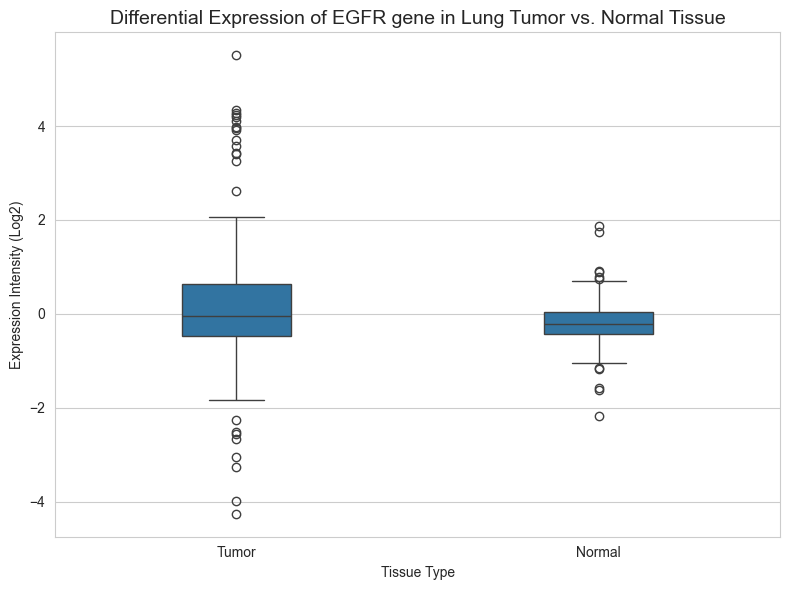

In [10]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

sns.boxplot(x='Status', y='EGFR Expression (log2)', data=diff_expression_df, whis=1.5, width=0.3)

plt.title(f'Differential Expression of EGFR gene in Lung Tumor vs. Normal Tissue', fontsize=14)
plt.ylabel('Expression Intensity (Log2)')
plt.xlabel('Tissue Type')

plt.tight_layout()
plt.show()

p-value: 2.9493428085871727e-05


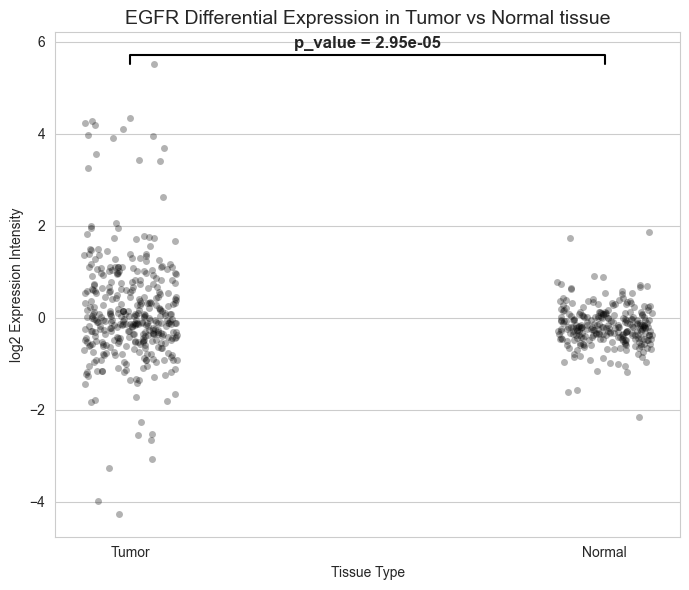

In [11]:
tumor_vals = diff_expression_df[diff_expression_df['Status'] == 'Tumor']['EGFR Expression (log2)']
normal_vals = diff_expression_df[diff_expression_df['Status'] == 'Normal']['EGFR Expression (log2)']

t_test, p_value = ttest_ind(tumor_vals, normal_vals)
print(f"p-value: {p_value}")

plt.figure(figsize=(7, 6))
sns.set_style("whitegrid")

sns.stripplot(x='Status', y='EGFR Expression (log2)', data=diff_expression_df, color='black', alpha=0.3)

y_max = diff_expression_df['EGFR Expression (log2)'].max()
line_height = y_max
plt.plot([0, 0, 1, 1], [line_height, line_height + 0.2, line_height + 0.2, line_height], lw=1.5, c='black')
plt.text(0.5, line_height + 0.3, f"p_value = {p_value:.2e}", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('EGFR Differential Expression in Tumor vs Normal tissue', fontsize=14)
plt.ylabel('log2 Expression Intensity')
plt.xlabel('Tissue Type')

plt.tight_layout()
plt.show()

In [12]:
kras_probes = ["208926_at", "214352_s_at"]

plot_data = []

for gsm_id, gsm in gse.gsms.items():
    for kras_id in kras_probes:
        expression_value = float(gsm.table.set_index('ID_REF').loc[kras_id, 'VALUE'])
        meta_str = gsm.metadata.get('characteristics_ch1', [''])[0].lower()

        if 'tumor' in meta_str:
            status = 'Tumor'
        elif 'healthy' in meta_str:
            status = 'Normal'
        else:
            continue
        
        plot_data.append({
            'sample_id': gsm_id,
            'KRAS Expression (log2)': expression_value,
            'Status': status
        })

plot_data

[{'sample_id': 'GSM475656',
  'KRAS Expression (log2)': -0.658138974,
  'Status': 'Tumor'},
 {'sample_id': 'GSM475656',
  'KRAS Expression (log2)': 0.094022847,
  'Status': 'Tumor'},
 {'sample_id': 'GSM475657',
  'KRAS Expression (log2)': -0.560776543,
  'Status': 'Normal'},
 {'sample_id': 'GSM475657',
  'KRAS Expression (log2)': -0.08826868,
  'Status': 'Normal'},
 {'sample_id': 'GSM475658',
  'KRAS Expression (log2)': -0.039697489,
  'Status': 'Normal'},
 {'sample_id': 'GSM475658',
  'KRAS Expression (log2)': 0.240857435,
  'Status': 'Normal'},
 {'sample_id': 'GSM475659',
  'KRAS Expression (log2)': 0.093896303,
  'Status': 'Normal'},
 {'sample_id': 'GSM475659',
  'KRAS Expression (log2)': -0.330797592,
  'Status': 'Normal'},
 {'sample_id': 'GSM475660',
  'KRAS Expression (log2)': -0.111643531,
  'Status': 'Normal'},
 {'sample_id': 'GSM475660',
  'KRAS Expression (log2)': 0.361611679,
  'Status': 'Normal'},
 {'sample_id': 'GSM475661',
  'KRAS Expression (log2)': 0.23372186,
  'Status

In [13]:
kras_diff_expression_df = pd.DataFrame(plot_data)
kras_diff_expression_df

,sample_id,KRAS Expression (log2),Status
0,GSM475656,-0.658139,Tumor
1,GSM475656,0.094023,Tumor
2,GSM475657,-0.560777,Normal
3,GSM475657,-0.088269,Normal
4,GSM475658,-0.039697,Normal
...,...,...,...
307,GSM475809,-0.088108,Normal
308,GSM475810,0.362001,Tumor
309,GSM475810,0.275073,Tumor
310,GSM475811,0.196628,Normal


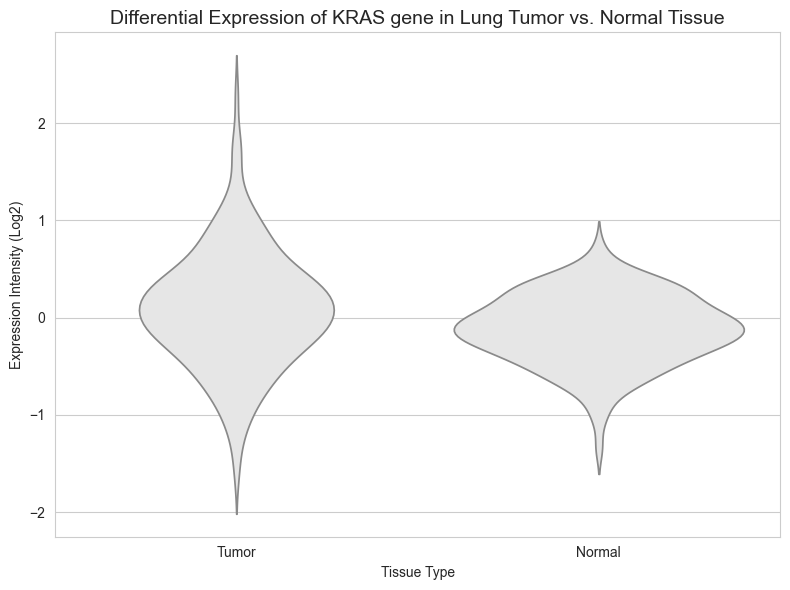

In [14]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

sns.violinplot(x='Status', y='KRAS Expression (log2)', data=kras_diff_expression_df, inner=None, color=".9")

plt.title(f'Differential Expression of KRAS gene in Lung Tumor vs. Normal Tissue', fontsize=14)
plt.ylabel('Expression Intensity (Log2)')
plt.xlabel('Tissue Type')

plt.tight_layout()
plt.show()

p-value: 0.0004299973206912518


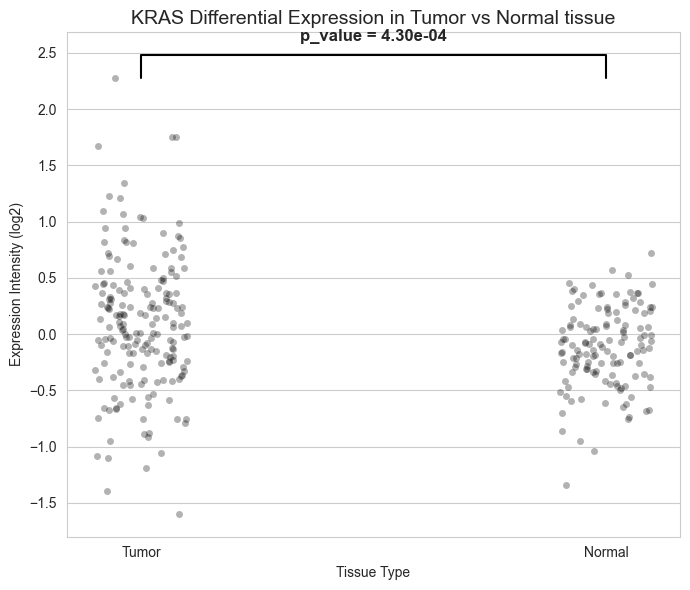

In [15]:
tumor_vals = kras_diff_expression_df[kras_diff_expression_df['Status'] == 'Tumor']['KRAS Expression (log2)']
normal_vals = kras_diff_expression_df[kras_diff_expression_df['Status'] == 'Normal']['KRAS Expression (log2)']

t_test, p_value = ttest_ind(tumor_vals, normal_vals)
print(f"p-value: {p_value}")

plt.figure(figsize=(7, 6))
sns.set_style("whitegrid")

sns.stripplot(x='Status', y='KRAS Expression (log2)', data=kras_diff_expression_df, color='black', alpha=0.3)

y_max = kras_diff_expression_df['KRAS Expression (log2)'].max()
line_height = y_max
plt.plot([0, 0, 1, 1], [line_height, line_height + 0.2, line_height + 0.2, line_height], lw=1.5, c='black')
plt.text(0.5, line_height + 0.3, f"p_value = {p_value:.2e}", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('KRAS Differential Expression in Tumor vs Normal tissue', fontsize=14)
plt.ylabel('Expression Intensity (log2)')
plt.xlabel('Tissue Type')

plt.tight_layout()
plt.show()

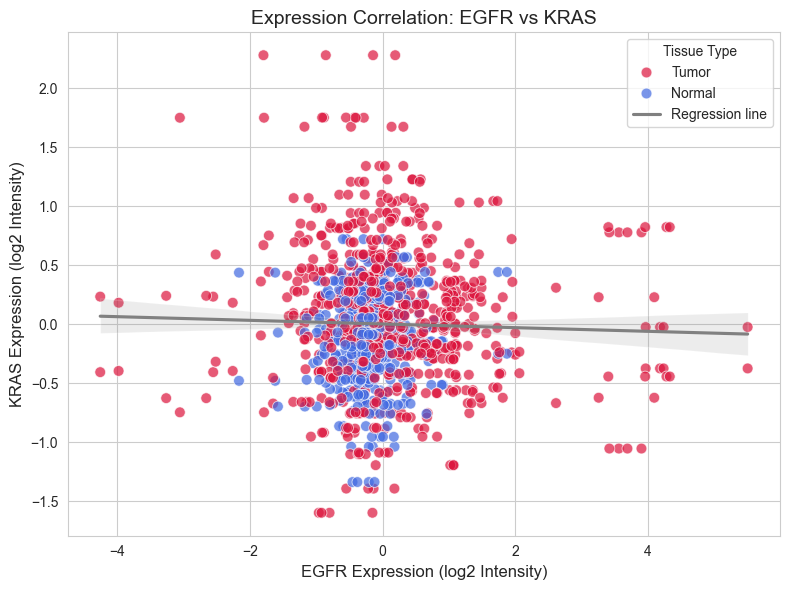

In [16]:
df = pd.merge(diff_expression_df, kras_diff_expression_df)

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

sns.scatterplot(data=df, x='EGFR Expression (log2)', y='KRAS Expression (log2)', hue='Status', 
                palette={'Tumor': 'crimson', 'Normal': 'royalblue'}, s=60, alpha=0.7)

sns.regplot(data=df, x='EGFR Expression (log2)', y='KRAS Expression (log2)', scatter=False, color='gray', 
            label='Regression line')

plt.title('Expression Correlation: EGFR vs KRAS', fontsize=14)
plt.xlabel('EGFR Expression (log2 Intensity)', fontsize=12)
plt.ylabel('KRAS Expression (log2 Intensity)', fontsize=12)
plt.legend(title='Tissue Type')

plt.tight_layout()
plt.show()